In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn .metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
seed = 143
np.random.seed(seed)

%matplotlib inline

In [38]:
df = pd.read_csv('autism_screening.csv')

In [39]:
len(df)

704

In [40]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [41]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [42]:
df.nunique()

A1_Score            2
A2_Score            2
A3_Score            2
A4_Score            2
A5_Score            2
A6_Score            2
A7_Score            2
A8_Score            2
A9_Score            2
A10_Score           2
age                46
gender              2
ethnicity          12
jundice             2
austim              2
contry_of_res      67
used_app_before     2
result             11
age_desc            1
relation            6
Class/ASD           2
dtype: int64

In [43]:
df.drop(columns=['age_desc'], inplace=True)

In [44]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
relation           0
Class/ASD          0
dtype: int64

In [45]:
df[df['age'] == df['age'].max()]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,383.0,f,Pasifika,no,no,New Zealand,no,1.0,Self,NO


In [46]:
# dropping record number 52
df.drop(index = 52, inplace = True)

# resetting index
df.reset_index(inplace = True)

In [47]:
df['ethnicity'] = df['ethnicity'].replace('?', 'Others')
df['ethnicity'] = df['ethnicity'].replace('others', 'Others')
df['ethnicity'].unique()

array(['White-European', 'Latino', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish'], dtype=object)

In [48]:
df['relation'] = df['relation'].replace('?', df['relation'].mode()[0])
df['relation'].unique()

array(['Self', 'Parent', 'Health care professional', 'Relative', 'Others'],
      dtype=object)

In [49]:
df['age'].fillna(df["age"].mean(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_41000\2074867894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df["age"].mean(), inplace=True)


In [50]:
df['Class/ASD'] = df['Class/ASD'].apply(lambda x: int(x == 'YES'))

In [51]:
df.drop(['index'], axis = 1, inplace = True)

In [52]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,Self,0
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,Self,0
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,Parent,1
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,Self,0
4,1,0,0,0,0,0,0,1,0,0,40.0,f,Others,no,no,Egypt,no,2.0,Self,0


c:\Users\ASUS\anaconda3\envs\ASD_Classifier\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 43.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ASUS\anaconda3\envs\ASD_Classifier\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Class/ASD', ylabel='result'>

c:\Users\ASUS\anaconda3\envs\ASD_Classifier\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 65.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\ASUS\anaconda3\envs\ASD_Classifier\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


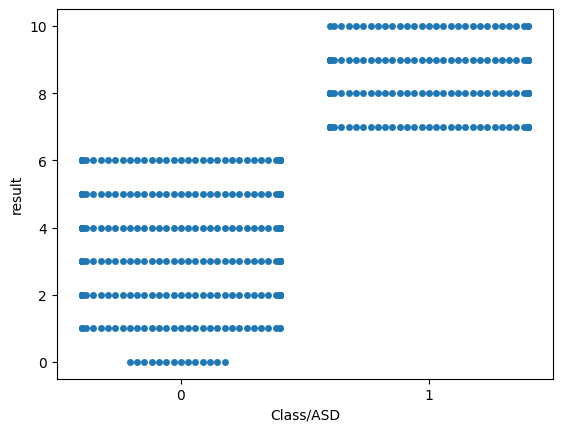

In [53]:
sns.swarmplot(x='Class/ASD', y='result', data=df)

In [54]:
df['Class/ASD'].value_counts()

Class/ASD
0    514
1    189
Name: count, dtype: int64

In [55]:
df = df.sample(frac=1, random_state=seed)
train_x,test_x,train_y,test_y = train_test_split(df.drop(columns=['Class/ASD']), df['Class/ASD'], test_size=0.2, random_state=seed)

In [56]:
test_x.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation
292,1,0,0,0,1,0,1,0,0,1,28.0,f,White-European,no,yes,United Kingdom,no,4.0,Self
600,1,0,1,0,0,0,0,1,0,0,42.0,f,Asian,no,no,India,no,3.0,Self
580,1,1,0,0,1,0,0,0,0,1,40.0,f,Black,no,no,United Kingdom,no,4.0,Parent
451,1,1,1,1,1,0,0,1,1,0,36.0,f,White-European,no,no,Italy,no,7.0,Self
148,1,1,1,1,1,0,1,1,1,0,35.0,m,White-European,yes,yes,United States,no,8.0,Self


In [65]:
test_x.dtypes

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jundice             object
austim              object
contry_of_res       object
used_app_before     object
result             float64
relation            object
dtype: object

In [57]:
print(train_y.value_counts())

Class/ASD
0    425
1    137
Name: count, dtype: int64


In [58]:
#Random Oversampling on Training Data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
train_x, train_y = ros.fit_resample(train_x, train_y)
print(train_y.value_counts())

Class/ASD
1    425
0    425
Name: count, dtype: int64


In [83]:
train_x_encoded = pd.get_dummies(train_x, columns=train_x.columns, drop_first=True)
train_x_encoded.head()
# Export DataFrame to CSV
train_x_encoded.to_csv('asd_data.csv', index=False)  # index=False to exclude row numbers

In [68]:
train_x_encoded.head()

,A1_Score_1,A2_Score_1,A3_Score_1,A4_Score_1,A5_Score_1,A6_Score_1,A7_Score_1,A8_Score_1,A9_Score_1,A10_Score_1,...,result_5.0,result_6.0,result_7.0,result_8.0,result_9.0,result_10.0,relation_Others,relation_Parent,relation_Relative,relation_Self
0,True,False,False,True,True,False,True,True,True,True,...,False,False,True,False,False,False,False,False,False,True
1,True,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,False,False,False,True
4,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,True


In [60]:
# Apply the same transformation to the test data
test_x_encoded = pd.get_dummies(test_x, columns=test_x.columns, drop_first=True)

# Align the test set columns to match the training set columns
train_x_encoded, test_x_encoded = train_x_encoded.align(test_x_encoded, join='left', axis=1)

# Fill missing columns in the test set with zeros
test_x_encoded = test_x_encoded.fillna(0)


In [61]:
test_x_encoded.head()

,A1_Score_1,A2_Score_1,A3_Score_1,A4_Score_1,A5_Score_1,A6_Score_1,A7_Score_1,A8_Score_1,A9_Score_1,A10_Score_1,...,result_5.0,result_6.0,result_7.0,result_8.0,result_9.0,result_10.0,relation_Others,relation_Parent,relation_Relative,relation_Self
292,True,False,False,False,True,False,True,False,False,True,...,False,False,False,False,False,False,0.0,False,False,True
600,True,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,0.0,False,False,True
580,True,True,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,0.0,True,False,False
451,True,True,True,True,True,False,False,True,True,False,...,False,False,True,False,False,False,0.0,False,False,True
148,True,True,True,True,True,False,True,True,True,False,...,False,False,False,True,False,False,0.0,False,False,True


In [62]:
from sklearn.preprocessing import QuantileTransformer

# Step 1: Initialize the Quantile Transformer
qt = QuantileTransformer(n_quantiles=704, output_distribution='normal', random_state=42)

# Step 2: Fit the Quantile Transformer on the training data and transform it
X_train_normalized = qt.fit_transform(train_x_encoded)

# Step 3: Transform the test data using the same transformer
X_test_normalized = qt.transform(test_x_encoded)

In [64]:
X_test_normalized

array([[ 5.19933758, -5.19933758, -5.19933758, ..., -5.19933758,
        -5.19933758,  5.19933758],
       [ 5.19933758, -5.19933758,  5.19933758, ..., -5.19933758,
        -5.19933758,  5.19933758],
       [ 5.19933758,  5.19933758, -5.19933758, ...,  5.19933758,
        -5.19933758, -5.19933758],
       ...,
       [-5.19933758,  5.19933758, -5.19933758, ..., -5.19933758,
        -5.19933758,  5.19933758],
       [ 5.19933758,  5.19933758,  5.19933758, ..., -5.19933758,
        -5.19933758,  5.19933758],
       [ 5.19933758,  5.19933758, -5.19933758, ..., -5.19933758,
        -5.19933758,  5.19933758]])

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_normalized, train_y)
y_pred = lda.predict(X_test_normalized)

print(f'Accuracy: {accuracy_score(test_y, y_pred):.2f}')
print(confusion_matrix(test_y, y_pred))
print(classification_report(test_y, y_pred))

Accuracy: 0.99
[[88  1]
 [ 0 52]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.98      1.00      0.99        52

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141



In [91]:
import pickle
from pydantic import BaseModel
class asd_input(BaseModel):
    A1_Score: int
    A2_Score: int
    A3_Score: int
    A4_Score: int
    A5_Score: int
    A6_Score: int
    A7_Score: int
    A8_Score: int
    A9_Score: int
    A10_Score: int
    age: float
    gender: object
    ethnicity: object
    jundice: object
    austim: object
    contry_of_res: object
    used_app_before: object
    result: float
    relation: object

pickle_in = open("lda_model.pkl","rb")
classifier=pickle.load(pickle_in)
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)
df_loaded = pd.read_csv('asd_data.csv')
data = asd_input(
    A1_Score=1, A2_Score=1, A3_Score=1, A4_Score=0, A5_Score=1,
    A6_Score=1, A7_Score=1, A8_Score=0, A9_Score=1, A10_Score=0,
    age=25.5, gender='male', ethnicity='white', jundice='no',
    austim='no', contry_of_res='USA', used_app_before='no',
    result=7.0, relation='Self'
)


In [92]:
df_loaded

,A1_Score_1,A2_Score_1,A3_Score_1,A4_Score_1,A5_Score_1,A6_Score_1,A7_Score_1,A8_Score_1,A9_Score_1,A10_Score_1,...,result_5.0,result_6.0,result_7.0,result_8.0,result_9.0,result_10.0,relation_Others,relation_Parent,relation_Relative,relation_Self
0,True,False,False,True,True,False,True,True,True,True,...,False,False,True,False,False,False,False,False,False,True
1,True,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,True,False,False,False,True
4,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,False,True,True,True,True,True,False,True,True,True,...,False,False,False,True,False,False,False,False,False,True
846,True,True,True,True,True,True,False,True,True,True,...,False,False,False,False,True,False,False,False,False,True
847,True,True,True,True,True,True,True,False,True,True,...,False,False,False,False,True,False,False,False,False,True
848,True,True,True,True,True,False,True,False,True,True,...,False,False,False,True,False,False,False,False,False,True


In [93]:
test_x = pd.DataFrame([data.dict()])
test_x

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation
0,1,1,1,0,1,1,1,0,1,0,25.5,male,white,no,no,USA,no,7.0,Self


In [94]:
test_x_encoded = pd.get_dummies(test_x, columns=test_x.columns)
test_x_encoded.head()

,A1_Score_1,A2_Score_1,A3_Score_1,A4_Score_0,A5_Score_1,A6_Score_1,A7_Score_1,A8_Score_0,A9_Score_1,A10_Score_0,age_25.5,gender_male,ethnicity_white,jundice_no,austim_no,contry_of_res_USA,used_app_before_no,result_7.0,relation_Self
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [95]:

df_loaded, test_x_encoded = df_loaded.align(test_x_encoded, join='left', axis=1)
test_x_encoded = test_x_encoded.fillna(0)
input_data_normalized = scaler.transform(test_x_encoded)
prediction = classifier.predict(input_data_normalized)
print(prediction)

[1]
